In [21]:
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.metrics import confusion_matrix
import seaborn as sns
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.metrics import classification_report

warnings.filterwarnings("ignore", category=DeprecationWarning) 
tf.random.set_seed(221)
np.random.seed(221)

In [22]:
val_accuracies = []
train_accuracies = []

In [23]:
def buildModel(neurons = 32, input_shape = (15,1)):
  model = Sequential()
  model.add(LSTM(neurons, input_shape=input_shape))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

def printMetrics(model, x, y, stage):
  scores = model.evaluate(x, y, verbose=0)
  print("(" + stage + ")" + "Erro da LSTM : %.2f%%" % (100-scores[1]*100))
  print("(" + stage + ")" + "Acurária da LSTM  %.2f%%" % (scores[1]*100))
  print("\n")

  if(stage == "TESTE"):
    val_accuracies.append(scores[1])
  else:
    train_accuracies.append(scores[1])

  if(stage == "TESTE"):
    print("Matriz de confusão (" + stage + ")")
    y_pred = model.predict(x, verbose = 0)
    y_pred = np.array(np.round(y_pred))
    y = np.array(y)
    cf_matrix = confusion_matrix(y, y_pred)

    print("Precision, recall e f1-score")
    print(classification_report(y, y_pred)) 
    print(cf_matrix[0][0], "Previu COMPRA e era COMPRA")
    print(cf_matrix[0][1], "Previu COMPRA e era VENDA")  
    print(cf_matrix[1][0], "Previu VENDA e era COMPRA")
    print(cf_matrix[1][1], "Previu VENDA e era VENDA")

    sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')
    plt.show()

def getData(action, training = False, dropDays=0):
  step = "treino" if training else "teste"
  df = pd.read_csv("./" + action + "./" + step + ".csv")
  df.drop(columns=["Unnamed: 0", "Smoothed_Close", "Close", "Date"], inplace=True)

  if(dropDays > 0):
    columns_to_drop = []
    for day in reversed(range(dropDays)):
      columns_to_drop.append("Past_" + str(15-day)+ "_Days_Close")
    df.drop(columns=columns_to_drop, inplace=True)

  x = df.drop(columns=["Label"])
  y = df["Label"]

  scaler = MinMaxScaler(feature_range=(0, 1))
  x = scaler.fit_transform(x)
  y = y.replace(-1, 0)
  
  x = np.reshape(x, (x.shape[0], x.shape[1], 1))
  return x, y

In [24]:
action = "BBAS3.SA"
x_train, y_train = getData(action=action, training=True)
x_test, y_test = getData(action=action, training=False)
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(4735, 15, 1)
(4735,)
(1185, 15, 1)
(1185,)


(TREINO)Erro da LSTM : 25.17%
(TREINO)Acurária da LSTM  74.83%


(TESTE)Erro da LSTM : 28.10%
(TESTE)Acurária da LSTM  71.90%


Matriz de confusão (TESTE)
Precision, recall e f1-score
              precision    recall  f1-score   support

           0       0.70      0.89      0.79       689
           1       0.76      0.48      0.59       496

    accuracy                           0.72      1185
   macro avg       0.73      0.69      0.69      1185
weighted avg       0.73      0.72      0.70      1185

613 Previu COMPRA e era COMPRA
76 Previu COMPRA e era VENDA
257 Previu VENDA e era COMPRA
239 Previu VENDA e era VENDA


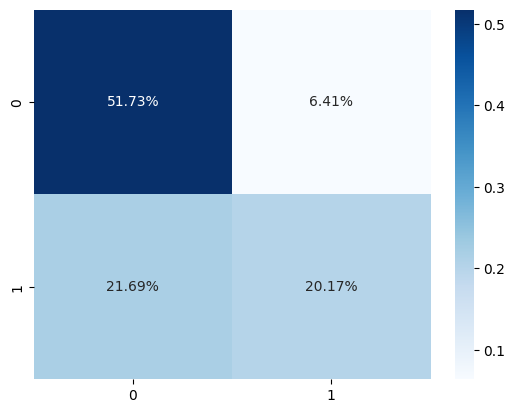

In [25]:
model = buildModel()
history = model.fit(x_train, y_train, validation_split = 0.2, epochs=100, batch_size=10, verbose=0)
printMetrics(model, x_train, y_train, "TREINO")
printMetrics(model, x_test, y_test, "TESTE") 

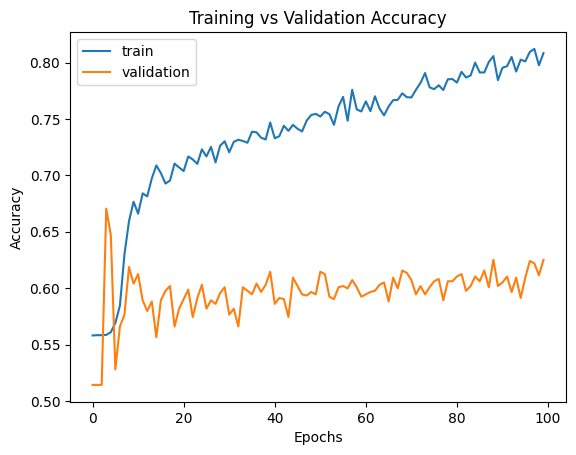

In [26]:
plt.figure(1)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["train", "validation"], loc='upper left')
plt.show()

Treinando modelo para a ação: BBAS3.SA
(TREINO)Erro da LSTM : 24.20%
(TREINO)Acurária da LSTM  75.80%


(TESTE)Erro da LSTM : 27.93%
(TESTE)Acurária da LSTM  72.07%


Matriz de confusão (TESTE)
Precision, recall e f1-score
              precision    recall  f1-score   support

           0       0.71      0.89      0.79       689
           1       0.76      0.49      0.59       496

    accuracy                           0.72      1185
   macro avg       0.73      0.69      0.69      1185
weighted avg       0.73      0.72      0.71      1185

611 Previu COMPRA e era COMPRA
78 Previu COMPRA e era VENDA
253 Previu VENDA e era COMPRA
243 Previu VENDA e era VENDA


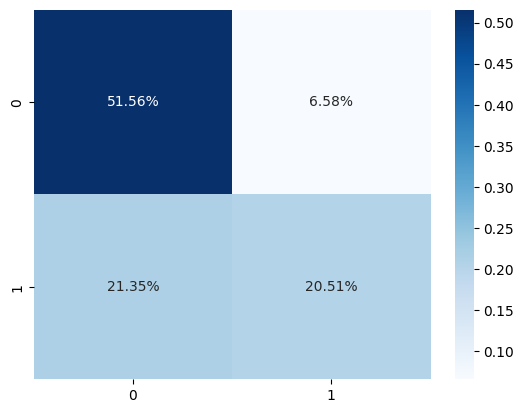



--------------------------------------------#################------------------------------------------------------


Treinando modelo para a ação: CSNA3.SA
(TREINO)Erro da LSTM : 12.67%
(TREINO)Acurária da LSTM  87.33%


(TESTE)Erro da LSTM : 14.17%
(TESTE)Acurária da LSTM  85.83%


Matriz de confusão (TESTE)
Precision, recall e f1-score
              precision    recall  f1-score   support

           0       0.96      0.79      0.87       688
           1       0.77      0.95      0.85       498

    accuracy                           0.86      1186
   macro avg       0.86      0.87      0.86      1186
weighted avg       0.88      0.86      0.86      1186

543 Previu COMPRA e era COMPRA
145 Previu COMPRA e era VENDA
23 Previu VENDA e era COMPRA
475 Previu VENDA e era VENDA


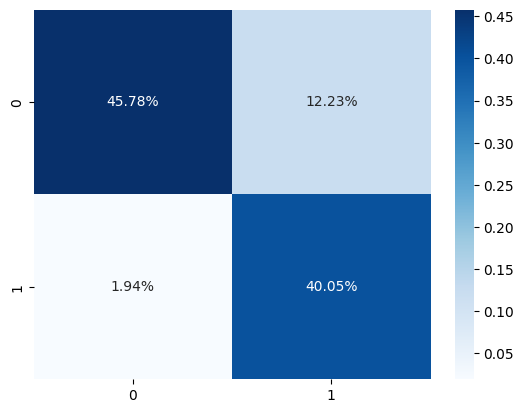



--------------------------------------------#################------------------------------------------------------


Treinando modelo para a ação: PETR4.SA
(TREINO)Erro da LSTM : 13.19%
(TREINO)Acurária da LSTM  86.81%


(TESTE)Erro da LSTM : 15.96%
(TESTE)Acurária da LSTM  84.04%


Matriz de confusão (TESTE)
Precision, recall e f1-score
              precision    recall  f1-score   support

           0       0.88      0.77      0.82       581
           1       0.81      0.90      0.85       622

    accuracy                           0.84      1203
   macro avg       0.85      0.84      0.84      1203
weighted avg       0.84      0.84      0.84      1203

449 Previu COMPRA e era COMPRA
132 Previu COMPRA e era VENDA
60 Previu VENDA e era COMPRA
562 Previu VENDA e era VENDA


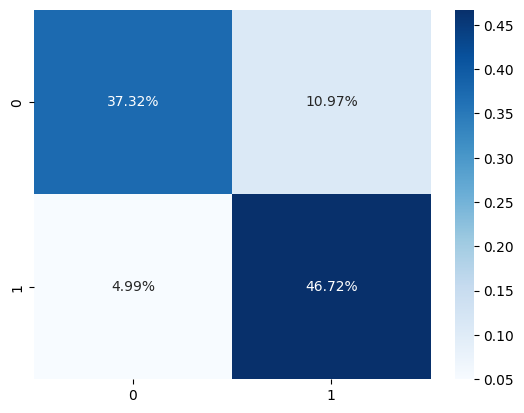



--------------------------------------------#################------------------------------------------------------


Treinando modelo para a ação: VALE3.SA
(TREINO)Erro da LSTM : 16.99%
(TREINO)Acurária da LSTM  83.01%


(TESTE)Erro da LSTM : 19.78%
(TESTE)Acurária da LSTM  80.22%


Matriz de confusão (TESTE)
Precision, recall e f1-score
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       601
           1       0.83      0.76      0.79       602

    accuracy                           0.80      1203
   macro avg       0.80      0.80      0.80      1203
weighted avg       0.80      0.80      0.80      1203

507 Previu COMPRA e era COMPRA
94 Previu COMPRA e era VENDA
144 Previu VENDA e era COMPRA
458 Previu VENDA e era VENDA


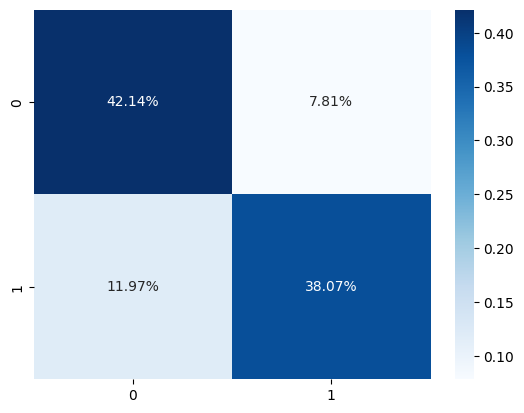



--------------------------------------------#################------------------------------------------------------




In [27]:
actions = ["BBAS3.SA", "CSNA3.SA", "PETR4.SA", "VALE3.SA"]


for action in actions:
  x_train, y_train = getData(action=action, training=True)
  x_test, y_test = getData(action=action, training=False)

  model = buildModel()
  print("Treinando modelo para a ação:", action)
  history = model.fit(x_train, y_train, validation_split = 0.2, epochs=100, batch_size=10, verbose=0)
  printMetrics(model, x_train, y_train, "TREINO")
  printMetrics(model, x_test, y_test, "TESTE")

  print("\n")
  print("--------------------------------------------#################------------------------------------------------------")
  print("\n")
  

In [28]:
# Testando uma acuracia utilizando uma quantidade menor de t anteriores
# Resultado: Os modelos apresentaram uma acuracia inferior ou igual a quando utilizado os 15 dias

# actions = ["BBAS3.SA", "CSNA3.SA", "PETR4.SA", "VALE3.SA"]
# for action in actions:
#   x_train, y_train = getData(action=action, training=True, dropDays=7)
#   x_test, y_test = getData(action=action, training=False, dropDays=7)

#   model = buildModel(input_shape=(8, 1))
#   history = model.fit(x_train, y_train, validation_split = 0.2, epochs=100, batch_size=10, verbose=0)
#   printMetrics(model, x_train, y_train, "TREINO")
  
#   print("\n")
#   print("--------------------------------------------#################------------------------------------------------------")
#   print("\n")

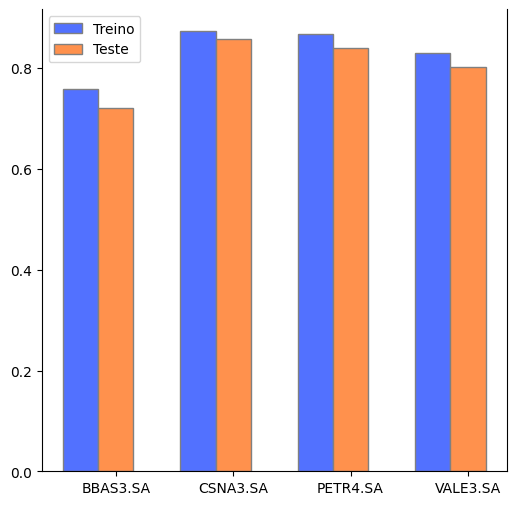

In [37]:
barWidth = 0.30
fig, ax= plt.subplots(figsize =(6, 6)) 

br1 = np.arange(4) 
br2 = [x + barWidth for x in br1] 
 
ax.spines['top'].set_visible(False)

# Make the plot
plt.bar(br1, train_accuracies[1: 5], color ='#5271FF', width = barWidth, 
        edgecolor ='grey', label ='Treino') 
plt.bar(br2, val_accuracies[1: 5], color ='#FF914D', width = barWidth, 
        edgecolor ='grey', label ='Teste') 

# Adding Xticks 
plt.xticks([r + barWidth for r in range(4)], ["BBAS3.SA","CSNA3.SA","PETR4.SA","VALE3.SA"])
plt.savefig('chart.png')
 
plt.legend()
plt.show() 
